(impurity)=
# Impurity and information criterions

Information criteria are statistical measures used to evaluate and compare different models, including decision trees, based on their ability to fit the data while penalizing for model complexity. Information criteria are often used during the process of splitting nodes in decision trees to determine the best feature and split point. Two common information criteria used in this context are the Gini impurity and entropy.

## Impurity measure in classification trees

Let $\mathcal Y = \{1, \ldots, K\}$. Estimate probability of class $k$ at some node $V$ as

$$
p_k = \frac 1n\sum\limits_{(\boldsymbol x_i, y_i)\in V} \mathbb I[y_i = k].
$$

The main two impurity measures for classification are **entropy** and **Gini**.

### Entropy

The entropy of the distribution $(p_k)$ is

```{math}
:label: entropy
\mathbb H[p] = -\sum\limits_k p_k \log p_k.
```


For binary logarithm entropy is measured in **bits**, for natural — in **nats**.

**Q**. What is the entropy of the uniform distribution, i.e., $p_k = \frac 1K$, $k=1,\ldots, K$?

### Gini

Note that $-\ln(1-t) \sim t$ as $t \to 0$. After replacing $-\log p_k$ by $1-p_k$ in {eq}`entropy`, the entropy turns into **Gini** impurity measure

$$
    \mathbb G[p] = \sum\limits_k p_k(1-p_k).
$$

**Q**. What is the Gini measure of the uniform distribution $p_k = \frac 1K$, $k=1,\ldots, K$?

The Gini measure can be written also as

$$
    \mathbb G[p] = \sum\limits_k p_k - \sum\limits_k p_k^2 = 1 -  \sum\limits_k p_k^2.
$$

From here it is clear that $\mathbb G[p] < 1$ for any distribution $p$.

If $K=2$, then probabilites are equal to $p$ and $1-p$ for some $p \in [0, 1]$. For this particular case the comparison of entropy and Gini measures is shown on the next picture.

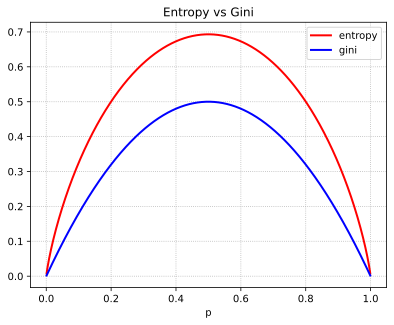

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'

xs = np.linspace(0.001, 0.999, num=999)
plt.plot(xs, -xs*np.log(xs) - (1-xs)*np.log(1-xs), c='r', lw=2, label="entropy")
plt.plot(xs, 2*xs*(1-xs), c='b', lw=2, label="gini")
plt.grid(ls=":")
plt.xlabel("p")
plt.title("Entropy vs Gini")
plt.legend();

### Information gain

Suppose that in the node $V$ the distribution of classes is $p$, and after the split the distributions in the child nodes $V^l$ and $V^r$ are $p^l$ and $p^r$ respectively. Than the **information gain** of the split $V \to (V^l, V^r)$  is 

$$
    \mathbb H[p] - \frac{\vert V^l\vert}{\vert V\vert}\mathbb H[p^l]- \frac{\vert V^r\vert}{\vert V\vert}\mathbb H[p^r]
$$

(also could use Gini measure). The greater information gain is, the more uncertainty was removed by the split.

**Q**. Suppose that $p^l = p^r = p$. What is the information gain of such split?

### Iris dataset

In [11]:
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_graphviz

iris = sns.load_dataset("iris")
y = iris['species']
X = iris.drop("species", axis=1)

clf_ent = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf_ent = clf_ent.fit(X, y)
print("Entropy accuracy:", clf_ent.score(X, y))

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)
clf_gini = clf_gini.fit(X, y)
print("Gini accuracy:", clf_gini.score(X, y))

Entropy accuracy: 0.96
Gini accuracy: 0.96


Entropy decision tree:

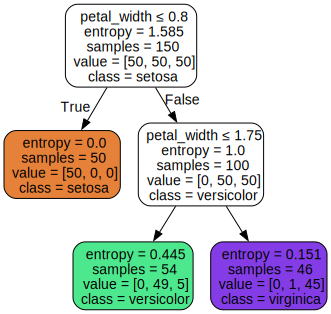

In [12]:
import graphviz
dot_data = export_graphviz(clf_ent, out_file=None,
                     feature_names=iris.columns[:-1],
                     class_names=['setosa', 'versicolor', 'virginica'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Gini decision tree:

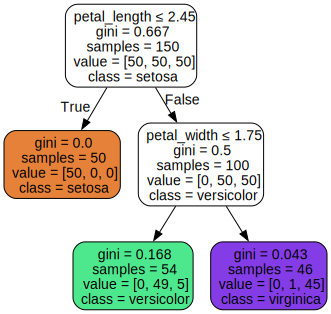

In [13]:
import graphviz
dot_data = export_graphviz(clf_gini, out_file=None, 
                     feature_names=iris.columns[:-1],  
                     class_names=['setosa', 'versicolor', 'virginica'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Impurity measure in regression trees

If we choose MSE as the loss function, the impurity measure of the leaf $V$ if given by

$$
    H(V)=\frac 1{\vert V\vert} \sum\limits_{(\boldsymbol x_i, y_i)\in V} (y_i - c)^2, \quad c = \frac 1{\vert V\vert} \sum\limits_{(\boldsymbol x_i, y_i)\in V} y_i.
$$

After splitting into $V^l$ and $V^r$ we obtain

$$
    H(V)= \frac {1}{\vert V\vert} \sum\limits_{(\boldsymbol x_i, y_i)\in V^l} (y_i - c^l)^2 + \frac {1}{\vert V\vert} \sum\limits_{(\boldsymbol x_i, y_i)\in V^r} (y_i - c^r)^2
    =\frac {\vert V^l\vert}{\vert V\vert}H(V^l) + \frac {\vert V^r\vert}{\vert V\vert}H(V^r),
$$

where

$$
c^l = \frac 1{\vert V^l\vert} \sum\limits_{(\boldsymbol x_i, y_i)\in V^l} y_i,\quad
c^r = \frac 1{\vert V^r\vert} \sum\limits_{(\boldsymbol x_i, y_i)\in V^r} y_i.
$$

The best split maximizes information gain

$$
    H(V) - \frac {\vert V^l\vert}{\vert V\vert}H(V^l) - \frac {\vert V^r\vert}{\vert V\vert}H(V^r).
$$